# Revision control software

## There are two main purposes of RCS systems:
- Keep track of changes in the source code.
    - Allow reverting back to an older revision if something goes wrong.
    - Work on several "branches" of the software concurrently.
    - Tags revisions to keep track of which version of the software that was used for what (for example, "release-1.0", "paper-A-final", ...)
- Make it possible for serveral people to collaboratively work on the same code base simultaneously.
    - Allow many authors to make changes to the code.
    - Clearly communicating and visualizing changes in the code base to everyone involved.

## Basic principles and terminology for RCS systems

In an RCS, the source code or digital content is stored in a **repository**.

- The repository does not only contain the latest version of all files, but the complete history of all changes to the files since they were added to the repository.

- A user can **checkout** the repository, and obtain a local working copy of the files. All changes are made to the files in the local working directory, where files can be added, removed and updated.

- When a task has been completed, the changes to the local files are **commited** (saved to the repository).

- If someone else has been making changes to the same files, a **conflict** can occur. In many cases conflicts can be **resolved** automatically by the system, but in some cases we might manually have to merge different changes together.

- It is often useful to create a new **branch** in a repository, or a **fork** or **clone** of an entire repository, when we doing larger experimental development. The main branch in a repository is called often **master** or **trunk**. When work on a branch or fork is completed, it can be merged in to the master branch/repository.

- With distributed RCSs such as GIT or Mercurial, we can **pull** and **push** changesets between different repositories. For example, between a local copy of there repository to a central online reposistory (for example on a community repository host site like github.com).

### Some good RCS software
1. GIT (git) : http://git-scm.com/
2. Mercurial (hg) : http://mercurial.selenic.com/
In the rest of this lecture we will look at git, although hg is just as good and work in almost exactly the same way.


### Installing git
On Linux:

`$ sudo apt-get install git`

On Mac (with macports):

`$ sudo port install git`

The first time you start to use git, you'll need to configure your author information:

`$ git config --global user.name 'taro taro'`

`$ git config --global user.email taro@example.jp`

### Creating and cloning a repository
To create a brand new empty repository, we can use the command `git init repository-name`:

In [1]:
# create a new git repository called gitdemo:
!git init gitdemo

Initialized empty Git repository in C:/Users/cauch/Downloads/Data Science/DSW1/gitdemo/.git/


If we want to fork or clone an existing repository, we can use the command `git clone repository`:

In [3]:
!git clone https://github.com/qutip/qutip

Cloning into 'qutip'...


`git clone` can take a URL ro a public repository, like above, or a path to a local directory:

In [4]:
!git clone gitdemo gitdemo2

Cloning into 'gitdemo2'...
done.


### Status
Using the command `git status` we get a summary of the current status of the working directory. It shows if we have modified, added or removed files.

In [1]:
!pwd

/c/Users/cauch/Downloads/Data Science/DSW1/gitdemo


In [2]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	RCS.ipynb

nothing added to commit but untracked files present (use "git add" to track)


## Adding files and commiting changes
To add a new file to the repository, we first create the file and then use the `git add filename` command:

In [1]:
%%file README

A file with information about the gitdemo repository.

Writing README


In [2]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	RCS.ipynb
	README

nothing added to commit but untracked files present (use "git add" to track)


In [5]:
%%file .gitignore

.ipynb_checkpoints

Overwriting .gitignore


In [6]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	RCS.ipynb
	README

nothing added to commit but untracked files present (use "git add" to track)


In [7]:
!git add README

In [8]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   README

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	RCS.ipynb



In [9]:
!git commit -m "Added a README file" README

[master (root-commit) 5c1b919] Added a README file
 1 file changed, 2 insertions(+)
 create mode 100644 README


In [10]:
!git add -A

In [11]:
!git commit -m "added notebook and .gitignore file"

[master e2ed263] added notebook and .gitignore file
 2 files changed, 463 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 RCS.ipynb


In [12]:
!git status

On branch master
nothing to commit, working tree clean


After *commiting* the changes to the repository from the local directory, `git status` again reports that working directory is clean.

### Commiting changes
When files that is tracked by Git are changed, they are listed as *modified* by `git status`:

In [17]:
%%file README

A file with information about the gitdemo repository.

A new line.

Overwriting README


In [18]:
%autosave 0

Autosave disabled


In [19]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   RCS.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [15]:
!git commit -m "added one more line in README" README

[master 6abc5cb] added one more line in README
 1 file changed, 2 insertions(+)


In [16]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   RCS.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [20]:
!git commit -m "some changes in the notebook" RCS.ipynb

[master 725b57c] some changes in the notebook
 1 file changed, 126 insertions(+), 31 deletions(-)


In [21]:
!git status

On branch master
nothing to commit, working tree clean


### Removing files
To remove file that has been added to the repository, use `git rm filename`, which works similar to `git add filename`:

In [22]:
%%file tmpfile

A short-lived file.

Writing tmpfile


In [23]:
# Add it
!git add tmpfile

In [24]:
!git commit -m "Adding file tmpfile" tmpfile

[master 8780372] Adding file tmpfile
 1 file changed, 2 insertions(+)
 create mode 100644 tmpfile


In [25]:
# Remove it again:
!git rm tmpfile

rm 'tmpfile'


In [26]:
!git commit -m "remove file tmpfile" tmpfile

[master 4e584c8] remove file tmpfile
 1 file changed, 2 deletions(-)
 delete mode 100644 tmpfile


### Commit logs
The messages that are added to the commit command are supposed to give a short description of the changes/additions/deletions in the commit. If the -m "message" is omitted when working the `git commit` message, an editor will be opened for you to type a commit message (useful when a longer commit message is required).

We can look at the revision log by using the command `git log`:

In [27]:
!git log

commit 4e584c8245bd21f1727f9bd95755e08fee85a239
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:23:56 2020 +0900

    remove file tmpfile

commit 8780372b309d47bf1382eed903b168f3c8474aab
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:22:59 2020 +0900

    Adding file tmpfile

commit 725b57ca5ab61c449bed40432090f9478bec1c11
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:15:48 2020 +0900

    some changes in the notebook

commit 6abc5cb296bc12006475133d385b597331cd890d
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:01:07 2020 +0900

    added one more line in README

commit e2ed263fc0a3bd81aedf6c7f6dcdd8e5541ec60c
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 09:54:39 2020 +0900

    added notebook and .gitignore file

commit 5c1b919612f560f6bdb2d00b498e1335c967b8cb
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 09:53:32 2020 +0900

    Added a R

In the commit log, each revision is shown with a *timestamp*, a unique *alphanumeric* tag, *the author information*, and the *commit message*.

### Diffs
All commits results in a changeset, which has a "diff" describing the changes to the file associated with it. We can use `git diff` to see what has changed in a file:

In [28]:
%%file README

A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software.

Overwriting README


In [29]:
!git diff README

diff --git a/README b/README
index e3c46c9..d01bf3c 100644
--- a/README
+++ b/README
@@ -1,4 +1,4 @@
 
 A file with information about the gitdemo repository.
 
-A new line.
+README files usually contains installation instructions, and information about how to get started using the software.


That looks quite cryptic but it is a standard form for describing changes in files.

We can use other tools, like graphical user interfaces (GUI) or web based systems to get a more more easily understandable diff.

In github (a web-based GIT repository hosting service) it can look like this:

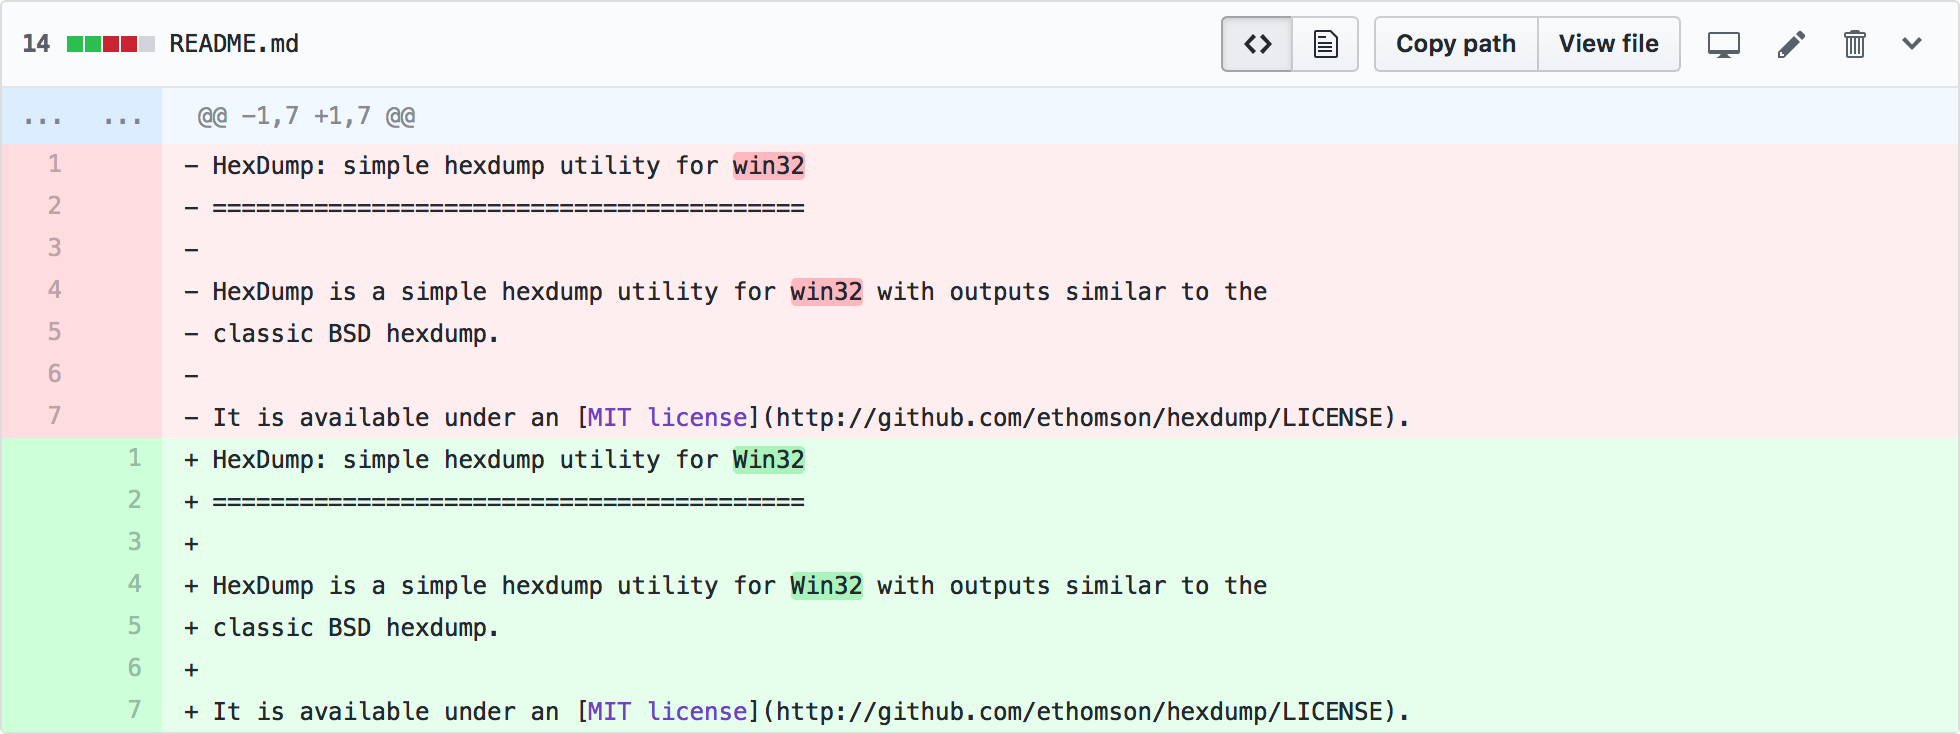

In [33]:
from IPython.display import Image

Image(filename='2.png')

### Discard changes in the working directory
To discard a change (revert to the lastest version in the repository) we can use `git checkout`
command like this:

In [37]:
!git checkout -- README

In [39]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	2.png

nothing added to commit but untracked files present (use "git add" to track)


In [41]:
!git add 2.png

In [42]:
!git commit -m "added a picture" 2.png

[master 49328e6] added a picture
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 2.png


In [43]:
!git status

On branch master
nothing to commit, working tree clean


### Checking out old revisions
If we want to get the code for a specific revision, we can use `git checkout` and giving it the hash code for the revision we are interested as argument:

In [44]:
!git log

commit 49328e607d7beaac963e75c837964fea0a934137
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 11:09:41 2020 +0900

    added a picture

commit 4e584c8245bd21f1727f9bd95755e08fee85a239
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:23:56 2020 +0900

    remove file tmpfile

commit 8780372b309d47bf1382eed903b168f3c8474aab
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:22:59 2020 +0900

    Adding file tmpfile

commit 725b57ca5ab61c449bed40432090f9478bec1c11
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:15:48 2020 +0900

    some changes in the notebook

commit 6abc5cb296bc12006475133d385b597331cd890d
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:01:07 2020 +0900

    added one more line in README

commit e2ed263fc0a3bd81aedf6c7f6dcdd8e5541ec60c
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 09:54:39 2020 +0900

    added notebook and .gitignor

In [45]:
!git checkout 5c1b919612f560f6bdb2d00b498e1335c967b8cb

Note: switching to '5c1b919612f560f6bdb2d00b498e1335c967b8cb'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 5c1b919 Added a README file


Now the content of all the files like in the revision with the hash code listed above (first revision)

In [46]:
!cat README


A file with information about the gitdemo repository.


We can move back to the "latest" (master) with the command:

In [47]:
!git checkout master

Previous HEAD position was 5c1b919 Added a README file
Switched to branch 'master'


In [48]:
!cat README


A file with information about the gitdemo repository.

A new line.


In [49]:
!git status

On branch master
nothing to commit, working tree clean


### Tagging and branching

#### Tags
Tags are named revisions. They are useful for making particular revisions for later references.

For example, we can tag our code with the tag "paper-1-final" when code for "paper-1" is done. Then we can always retreive exactly the code used for that paper even if we continue to work on and develop the code for future projects.

In [50]:
!git log

commit 49328e607d7beaac963e75c837964fea0a934137
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 11:09:41 2020 +0900

    added a picture

commit 4e584c8245bd21f1727f9bd95755e08fee85a239
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:23:56 2020 +0900

    remove file tmpfile

commit 8780372b309d47bf1382eed903b168f3c8474aab
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:22:59 2020 +0900

    Adding file tmpfile

commit 725b57ca5ab61c449bed40432090f9478bec1c11
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:15:48 2020 +0900

    some changes in the notebook

commit 6abc5cb296bc12006475133d385b597331cd890d
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 10:01:07 2020 +0900

    added one more line in README

commit e2ed263fc0a3bd81aedf6c7f6dcdd8e5541ec60c
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 09:54:39 2020 +0900

    added notebook and .gitignor

In [51]:
!git tag -a demotag1 -m "Code used for this and that purpose"

In [52]:
!git tag -l

demotag1


In [53]:
!git show demotag1

tag demotag1
Tagger: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 11:48:52 2020 +0900

Code used for this and that purpose

commit 49328e607d7beaac963e75c837964fea0a934137
Author: KONATE HAMIDOU <hamidou.konate@ymail.com>
Date:   Mon Mar 30 11:09:41 2020 +0900

    added a picture

diff --git a/2.png b/2.png
new file mode 100644
index 0000000..a20ef2d
Binary files /dev/null and b/2.png differ


To retrieve the code in the state corresponding to a particular tag, we can use the `git chechout tagname` command:

` $ git checkout demotag1`

### Branches
With branches we can create diverging code in the same repository. They are for example useful for experimental development that requires a lot of code changes that could break the functionality in the master branch.

Once the development of a branch has reached a stable state, it can always be merged back into the trunk. `Branching-development-merging` is a good development strategy when several people are involved in working on the same code base.

But even in single author repositories, it can be often useful to always keep the master branch in a working state, and always branch/fork before implementing a new feature, and later merge it back into the main trunk.

In Git, we can create a new branch like this:

In [54]:
!git branch exp1

We can list the existing branches like this:

In [55]:
!git branch

  exp1
* master


We can switch between branches using `checkout`:

In [57]:
!git checkout exp1

Switched to branch 'exp1'


Make a change in the new branch

In [58]:
%%file README

A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software.

Experimental addition

Overwriting README


In [59]:
!git commit -m "added a line in exp1 branch" README

[exp1 2231f9e] added a line in exp1 branch
 1 file changed, 3 insertions(+), 1 deletion(-)


In [60]:
!git branch

* exp1
  master


We can merge an existing branch and all its changesets into another branch (master branch for example):

First, let's go the target branch.

In [61]:
!git checkout master

Switched to branch 'master'


In [63]:
!git merge exp1

Updating 49328e6..2231f9e
Fast-forward
 README | 4 +++-
 1 file changed, 3 insertions(+), 1 deletion(-)


We can now delete the branch `exp1` now that it has been merged into the master:

In [64]:
!git branch -d exp1

Deleted branch exp1 (was 2231f9e).


In [65]:
!git branch

* master


In [66]:
!cat README


A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software.

Experimental addition


### Pulling and pushing changesets between repositories
If the repository has been cloned from another repository, for example on github, it automatically remembers the address of the parent repository (called origin).

In [71]:
!git remote

In [72]:
!git remote add origin https://github.com/Hamidou16/gitdemo.git

In [73]:
!git remote

origin


In [2]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.


Everything up-to-date


In [3]:
!git remote show origin

* remote origin
  Fetch URL: https://github.com/Hamidou16/gitdemo.git
  Push  URL: https://github.com/Hamidou16/gitdemo.git
  HEAD branch: master
  Remote branch:
    master tracked
  Local branch configured for 'git pull':
    master merges with remote master
  Local ref configured for 'git push':
    master pushes to master (up to date)


### pull
We can retrieve updates from the origin repository by "pulling" changesets from "origin" to our repository.

In [4]:
!git pull origin

Already up to date.


In [5]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
